# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [6]:
# alpaca_api_key

In [7]:
response = requests.get(btc_url)
response = response.json()
btc_price = response['data']['1']['quotes']['USD']['price']

In [8]:
response = requests.get(eth_url)
response = response.json()
eth_price = response['data']['1027']['quotes']['USD']['price']

In [9]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $56420.40
The current value of your 5.3 ETH is $16544.48


In [10]:
# Fetch current BTC price
# YOUR CODE HERE!

# Fetch current ETH price
# YOUR CODE HERE!

# Compute current value of my crpto
# YOUR CODE HERE!

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $56420.40
The current value of your 5.3 ETH is $16544.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
# Create the Alpaca API object
# YOUR CODE HERE!

In [13]:
now_day = datetime.now()
today = now_day.strftime("%Y-%m-%d")
past_1_year = (now_day - timedelta(days=(365*1))).strftime("%Y-%m-%d")
past_5_year = (now_day - timedelta(days=(365*5))).strftime("%Y-%m-%d")

In [14]:
past_1_year

'2020-08-26'

In [15]:
# Format current date as ISO format
# YOUR CODE HERE!
timeframe = "1D"
start = pd.Timestamp(today, tz="America/New_York").isoformat()
end = pd.Timestamp(today, tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
price_spy_agg = api.get_barset(tickers, timeframe, start=start, end=end, limit=10).df
# Preview DataFrame
# YOUR CODE HERE!
price_spy_agg

AGG                                         SPY  \
                             open    high       low    close   volume    open   
2021-08-26 00:00:00-04:00  115.76  115.79  115.6444  115.785  4730638  448.61   

                                                             
                             high     low   close    volume  
2021-08-26 00:00:00-04:00  448.86  446.16  446.27  53455704

In [16]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(price_spy_agg['AGG']['close'])
spy_close_price = float(price_spy_agg['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.785
Current SPY closing price: $446.27


In [17]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $22,313.50
The current value of your 200 AGG shares is $23,157.00


### Savings Health Analysis

In [18]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
cryptos = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame({'amount' : {'crypto': cryptos, 'shares': shares}})
# Display savings DataFrame
display(df_savings)

,amount
crypto,72964.88
shares,45470.50


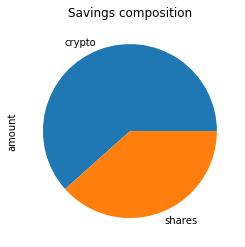

In [19]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.amount.plot.pie(title='Savings composition')

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund
# Calculate total amount of savings
# YOUR CODE HERE!
float(df_savings.sum())
# Validate saving health
# YOUR CODE HERE!

118435.38

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp(past_5_year, tz='America/New_York').isoformat()
end_date = pd.Timestamp(today, tz='America/New_York').isoformat()

In [22]:
# start_date

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
2017-09-06 00:00:00-04:00  110.42  110.52  110.2301  110.29  2476931.0   
2017-09-07 00:00:00-04:00  110.43  110.66  110.4200  110.58  1526058.0   
2017-09-08 00:00:00-04:00  110.54  110.58  110.4300  110.43  2004746.0   
2017-09-11 00:00:00-04:00  110.27  110.29  110.1000  110.14  1986181.0   
2017-09-12 00:00:00-04:00  110.04  110.06  109.9200  109.98  1827871.0   

                              SPY                                      
                             open    high     low   close      volume  
2017-09-06 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-09-07 00:00:00-04:00  247.26  247.27  246.40  246.89  38558992.0  
2017-09-08 00:00:00-04:00  246.53  247.11  246.30  246.55  39326387.0  
2017-09-11 00:00:00-04:00  248.04  249.30  248.02  249.17  48756933.0  
2017-09-12 00:00:00-04:00  249.63  250.07  249.42  250.07  42765330.0

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_Stock_Data = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.40, 60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [25]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_Stock_Data.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
2017-09-06 00:00:00-04:00  110.42  110.52  110.2301  110.29  2476931.0   
2017-09-07 00:00:00-04:00  110.43  110.66  110.4200  110.58  1526058.0   
2017-09-08 00:00:00-04:00  110.54  110.58  110.4300  110.43  2004746.0   
2017-09-11 00:00:00-04:00  110.27  110.29  110.1000  110.14  1986181.0   
2017-09-12 00:00:00-04:00  110.04  110.06  109.9200  109.98  1827871.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2017-09-06 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-09-07 00:00:00-04:00     0.002629  247.26  247.27  246.40  246.89   
2017-09-08 00:00:00-04:00    -0.001356  246.53  247.11  246.30  246.55   
2017-09-11 00:00:00-04:00    -0.002626  248.04  249.30  248.02  249.17   
2017-09-12 00:00:00-04:00    -0.001453  249.63  250.07  249.42  250.07   

                                                    
                               volume daily_return  
2017-09-06 00:00:00-04:00         NaN          NaN  
2017-09-07 00:00:00-04:00  38558992.0          NaN  
2017-09-08 00:00:00-04:00  39326387.0    -0.001377  
2017-09-11 00:00:00-04:00  48756933.0     0.010627  
2017-09-12 00:00:00-04:00  42765330.0     0.003612

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Stock_Data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.119501,-0.019819,2.018405,0.638721,0.746134,-0.414199,1.234103,2.524723,0.934391,-0.254810,...,1.421255,0.999628,2.198044,0.472483,1.715402,2.248595,-0.864691,1.790498,2.214893,2.063826
2,0.174883,-0.008923,2.842406,-0.487572,0.164292,-0.151134,2.157289,4.020412,-0.566403,-0.119281,...,2.976608,1.893496,3.787880,0.165409,0.933319,3.668778,-1.228532,1.983711,3.666154,3.505033
3,0.140769,-0.005665,7.435164,-0.188909,0.004038,-0.148536,4.595997,5.431239,-0.208609,0.001125,...,5.731206,5.318697,5.774189,-0.014566,0.993804,1.703579,-2.249066,1.722073,2.817485,3.498797
4,-0.048476,-0.004556,5.526909,-0.361625,0.004635,0.055696,6.508823,5.104493,-0.246027,0.000415,...,3.212699,-1.753050,6.353640,-0.017607,0.081128,3.560334,-5.229251,2.210275,4.008029,1.683696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
7557,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,...,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
7558,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,...,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
7559,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,...,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000


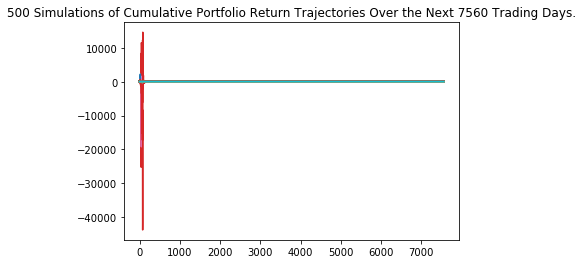

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!
simulation_plot = MC_Stock_Data.plot_simulation()

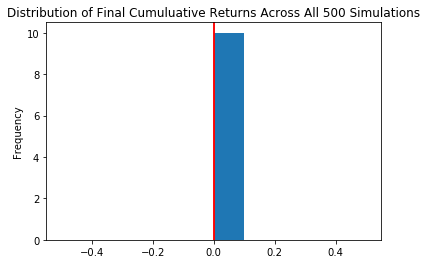

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution_plot = MC_Stock_Data.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")